# Analisis Exploratorio de Datos

## Importar datos, librerias y creación de funciones

In [709]:
# Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D


In [710]:
# Cargar dataset redWine y whiteWine
redWine = pd.read_csv('winequality-red.csv', sep=';')
whiteWine = pd.read_csv('winequality-white.csv', sep=';')

In [711]:
# Funcion para mostrar histograma y boxplot de un atributo
def histograma_boxplot(dataset, atributo):
  plt.figure(figsize=(10,4))

  plt.subplot(1,2,1)
  sns.histplot(dataset[atributo])

  plt.subplot(1,2,2)
  sns.boxplot(data=dataset[atributo])

In [712]:
# Funcion deteccion de outliers
def deteccion_outliers(dataset):
  cols = dataset.columns
  for i in cols:
    if i == 'type':
      continue
    q1 = dataset[i].quantile(0.25)
    q3 = dataset[i].quantile(0.75)
    iqr = q3 - q1
    lim_inf = q1 - 1.5 * iqr
    lim_sup = q3 + 1.5 * iqr
    outliers = dataset[(dataset[i] < lim_inf) | (dataset[i] > lim_sup)].shape[0]
    print(f"El atributo {i} tiene {outliers} outliers")

In [713]:
# Funcion resumen de datos
def resumen_datos(dataset):
  print("Cantidad de datos en wine: ", dataset.shape[0])
  print("Calidad media de vinos: ", dataset['quality'].mean())
  print("Cantidad de vinos con calidad mayor a la media: ", dataset[dataset['quality'] > dataset['quality'].mean()].shape[0])
  print("Cantidad de vinos con calidad menor a la media: ", dataset[dataset['quality'] < dataset['quality'].mean()].shape[0])
  print("La desviacion estandar de la calidad de los vinos es: ", dataset['quality'].std())
  print("La calidad minima de los vinos es: ", dataset['quality'].min())
  print("La calidad maxima de los vinos es: ", dataset['quality'].max())
  print("El 25% de los vinos tiene una calidad menor a: ", dataset['quality'].quantile(0.25))
  print("El 75% de los vinos tiene una calidad mayor a: ", dataset['quality'].quantile(0.75))
  print("El ultimo 25% de los vinos tiene una calidad entre ", dataset['quality'].quantile(0.25), " y ", dataset['quality'].quantile(0.75))
  print("La mayor concentracion de vinos se encuentra entre ", dataset['quality'].quantile(0.25), " y ", dataset['quality'].quantile(0.75))

In [714]:
# Funcion detección de asimetria
def deteccion_asimetria(dataset):
  cols = dataset.columns
  for i in cols:
    if i == 'type':
      continue
    print(f"El atributo {i} tiene una asimetria de {dataset[i].skew()}")

In [715]:
# Funcion mostrar mayor correlacion entre atributos
def mayor_correlacion(dataset, max_valor = 0, atributo = ''):
  corr = dataset.corr()
  if atributo != '':
    corr_quality = corr[[atributo]].copy()
    corr_quality['abs_corr'] = corr_quality[atributo].abs()
    corr_quality = corr_quality[corr_quality['abs_corr'] != 1]  # Excluir correlaciones igual a 1
    corr_quality = corr_quality.sort_values('abs_corr', ascending=False).head(3)

    print(corr_quality)
  elif max_valor != 0:
    max_valor = abs(max_valor)
    high_corr = corr[(corr > max_valor) | (corr < -max_valor)]
    high_corr = high_corr.stack().reset_index()
    high_corr['abs_corr'] = high_corr[0].abs()
    high_corr = high_corr[high_corr[0] != 1]  # Filtrar correlaciones diferentes de 1
    high_corr = high_corr.sort_values('abs_corr', ascending=False).drop_duplicates(0)
    print(high_corr)

## Analisis de los datos de Red Wine

### Resumen de Datos

In [716]:
# Observar dataset redWine
redWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [717]:
# Cantidad de datos en redWine y whiteWine
print("Cantidad de datos en redWine: ", redWine.shape[0])

Cantidad de datos en redWine:  1599


In [718]:
# Tipos de datos en redWine
print("Red Wine:")
redWine.info()

Red Wine:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Se observa que no es necesario hacer algun cambio en los datos, ya que no hay datos categoricos

In [719]:
# Resumen de datos en relacion de RedWine en base al atributo 'quality'
resumen_datos(redWine)

Cantidad de datos en wine:  1599
Calidad media de vinos:  5.6360225140712945
Cantidad de vinos con calidad mayor a la media:  855
Cantidad de vinos con calidad menor a la media:  744
La desviacion estandar de la calidad de los vinos es:  0.8075694397347023
La calidad minima de los vinos es:  3
La calidad maxima de los vinos es:  8
El 25% de los vinos tiene una calidad menor a:  5.0
El 75% de los vinos tiene una calidad mayor a:  6.0
El ultimo 25% de los vinos tiene una calidad entre  5.0  y  6.0
La mayor concentracion de vinos se encuentra entre  5.0  y  6.0


### Graficos de Histogramas y Boxplots

<Axes: xlabel='quality', ylabel='count'>

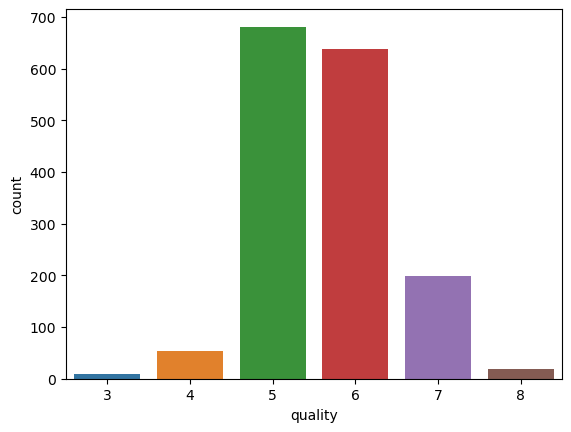

In [720]:
# Cantidades de vinos por calidad
sns.countplot(x='quality', data=redWine)

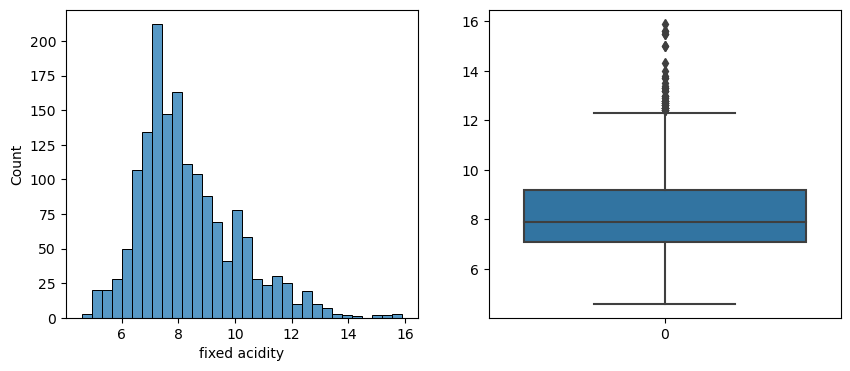

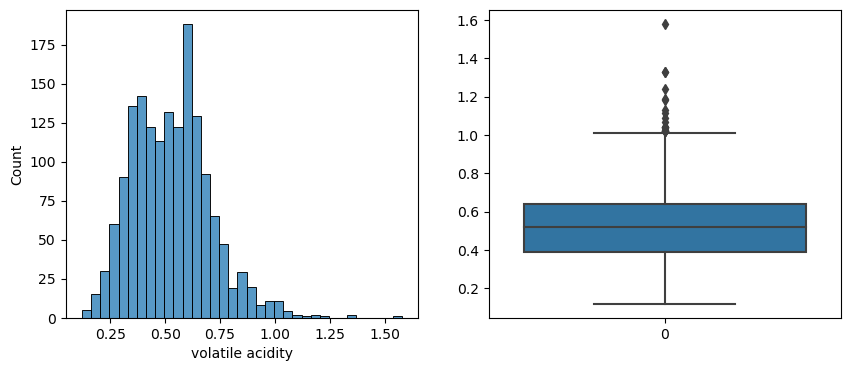

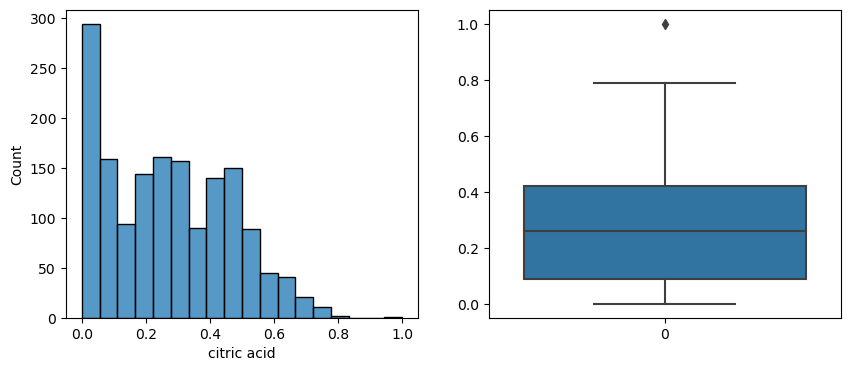

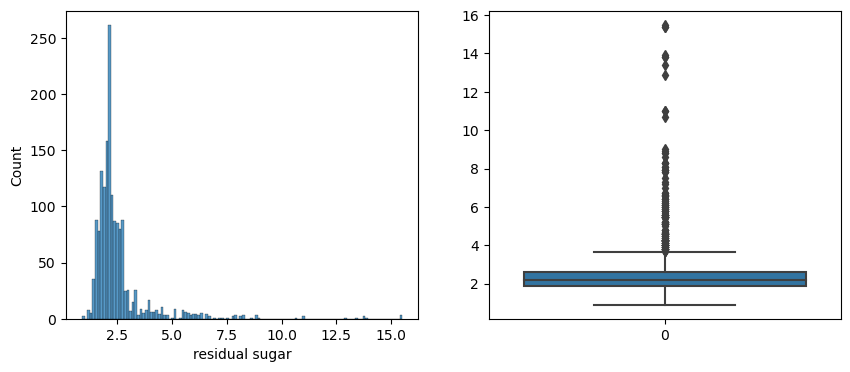

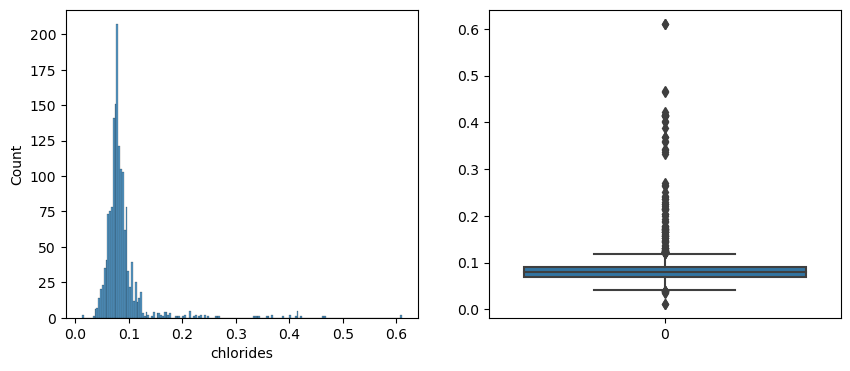

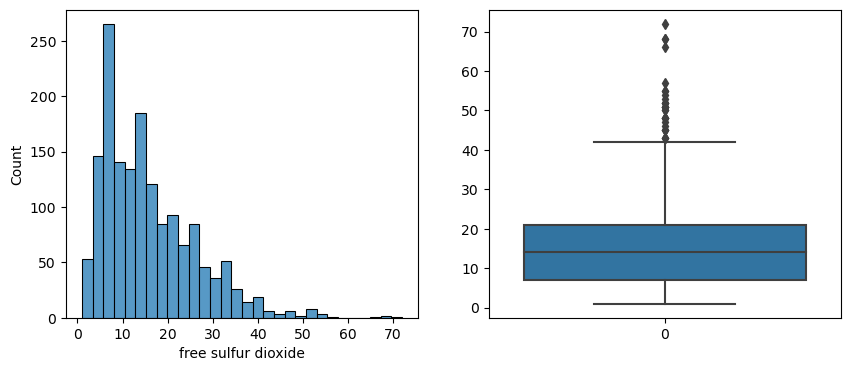

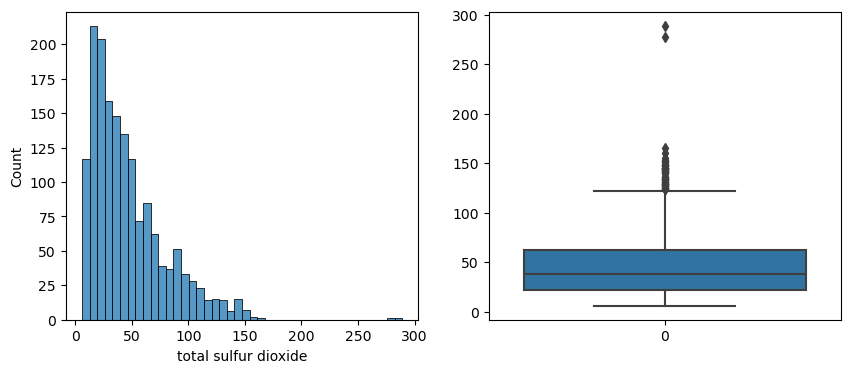

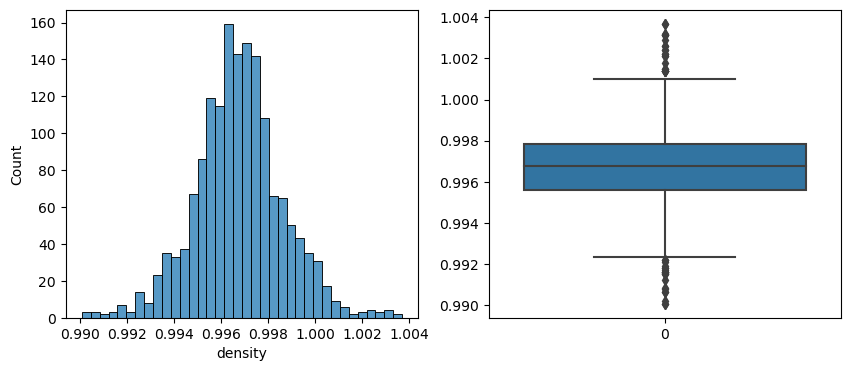

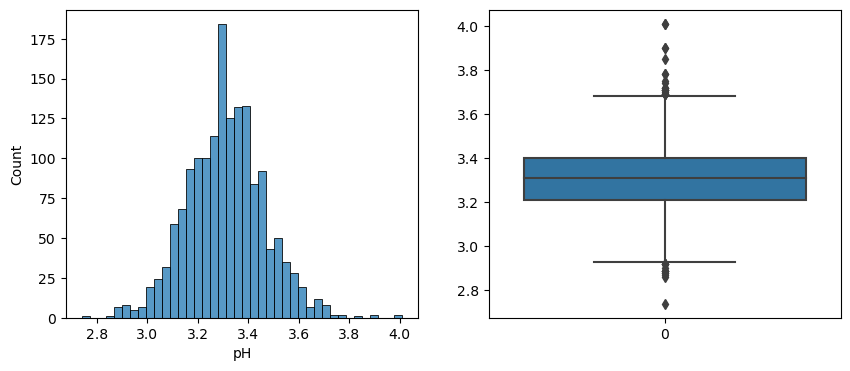

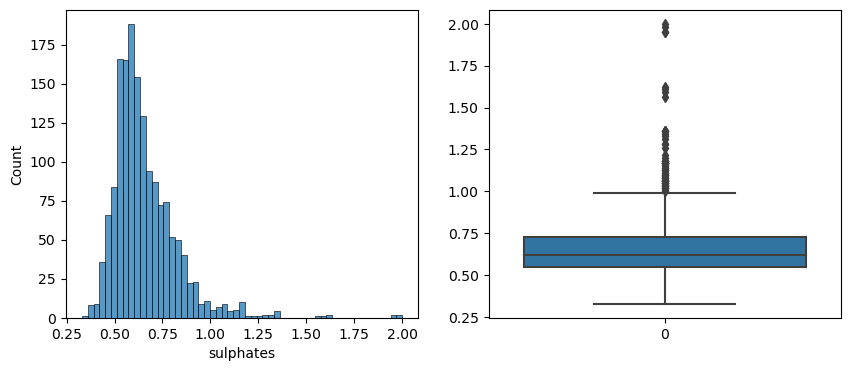

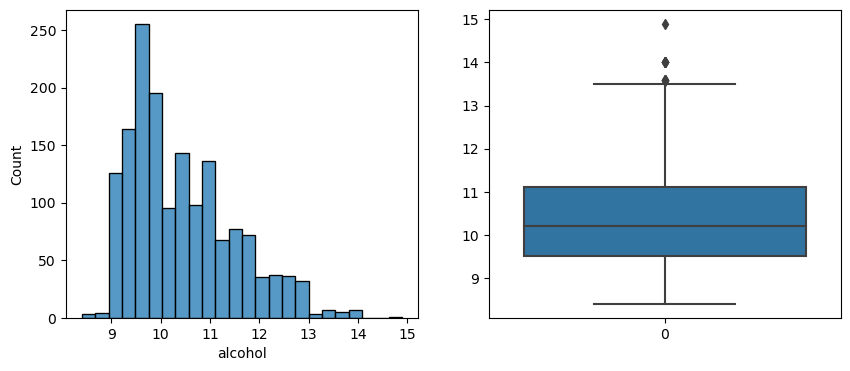

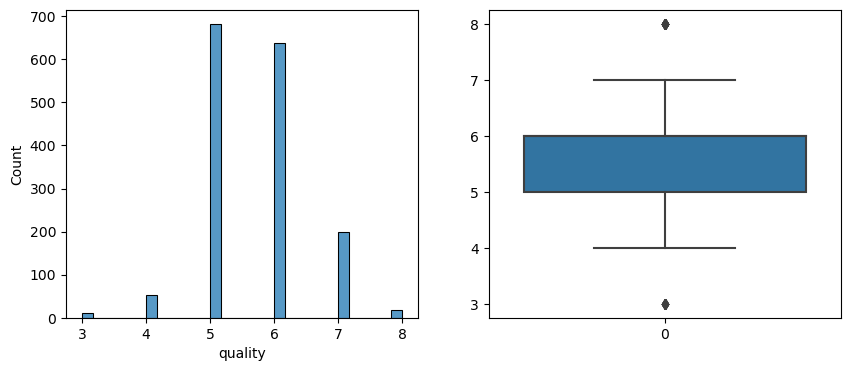

In [721]:
# Por cada atributo, mostrar histograma y boxplot
for atributo in redWine.columns:
  histograma_boxplot(redWine, atributo)

### Deteccion de Outliers

In [722]:
# Deteccion de outliers en wine
deteccion_outliers(redWine)

El atributo fixed acidity tiene 49 outliers
El atributo volatile acidity tiene 19 outliers
El atributo citric acid tiene 1 outliers
El atributo residual sugar tiene 155 outliers
El atributo chlorides tiene 112 outliers
El atributo free sulfur dioxide tiene 30 outliers
El atributo total sulfur dioxide tiene 55 outliers
El atributo density tiene 45 outliers
El atributo pH tiene 35 outliers
El atributo sulphates tiene 59 outliers
El atributo alcohol tiene 13 outliers
El atributo quality tiene 28 outliers


### Analisis Asimetrías

In [723]:
# Detectar asimetria en redWine
deteccion_asimetria(redWine)

El atributo fixed acidity tiene una asimetria de 0.9827514413284587
El atributo volatile acidity tiene una asimetria de 0.6715925723840199
El atributo citric acid tiene una asimetria de 0.3183372952546368
El atributo residual sugar tiene una asimetria de 4.54065542590319
El atributo chlorides tiene una asimetria de 5.680346571971724
El atributo free sulfur dioxide tiene una asimetria de 1.250567293314441
El atributo total sulfur dioxide tiene una asimetria de 1.515531257594554
El atributo density tiene una asimetria de 0.07128766294927483
El atributo pH tiene una asimetria de 0.19368349811284427
El atributo sulphates tiene una asimetria de 2.4286723536602945
El atributo alcohol tiene una asimetria de 0.8608288068888538
El atributo quality tiene una asimetria de 0.21780157547366327


### Analisis de Correlaciones entre variables

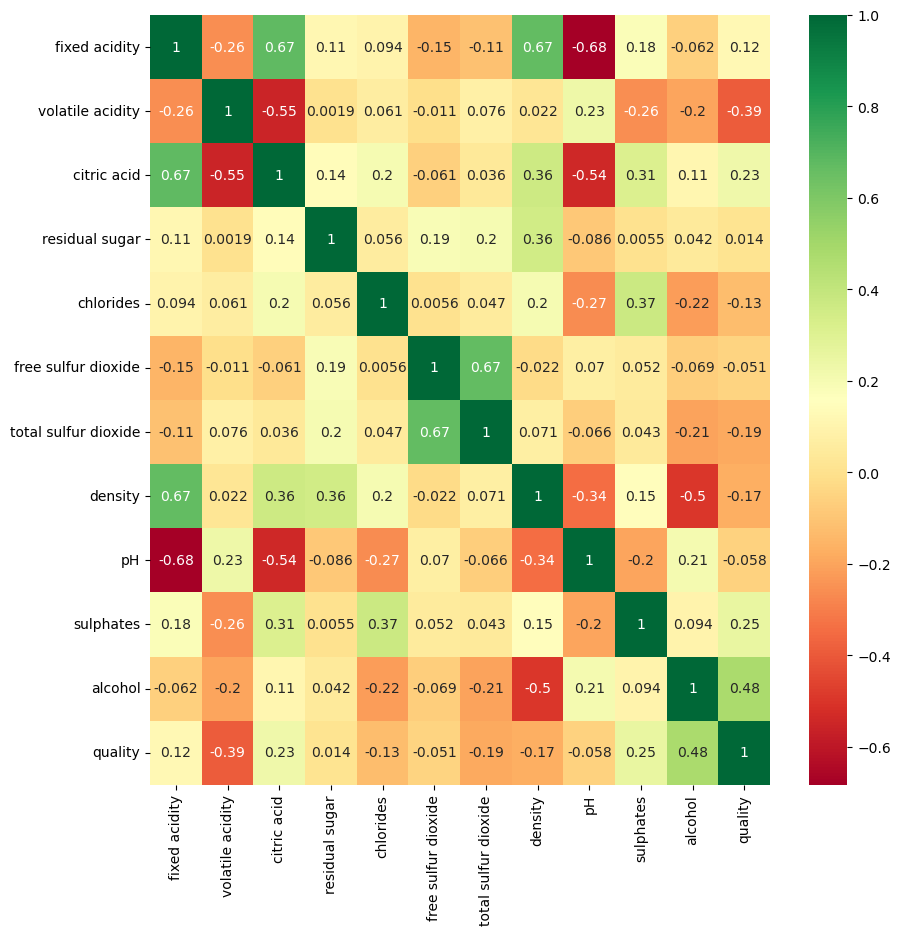

In [724]:
# Coeficiente de correlación de Pearson
plt.figure(figsize=(10,10))
sns.heatmap(redWine.corr(method='pearson'), annot=True, cmap='RdYlGn')
plt.show()

In [725]:
# Atributos con mayor correlacion entre ellos
mayor_correlacion(redWine, max_valor=0.6)

                level_0               level_1         0  abs_corr
3         fixed acidity                    pH -0.682978  0.682978
1         fixed acidity           citric acid  0.671703  0.671703
2         fixed acidity               density  0.668047  0.668047
10  free sulfur dioxide  total sulfur dioxide  0.667666  0.667666


### Analisis de Correlaciones en relacion a la variable Quality

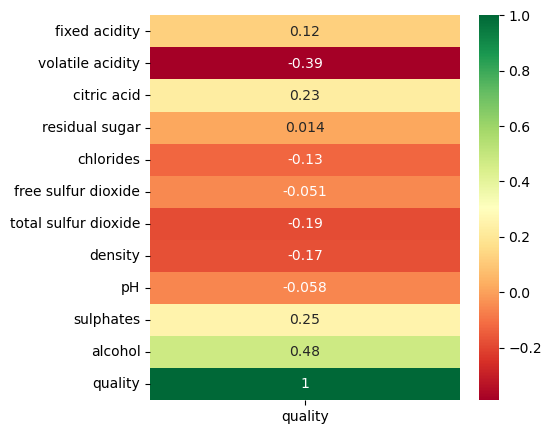

In [726]:
# Correlacion con la variable 'quality' del dataset wine a través de un mapa de calor
plt.figure(figsize=(5,5))
sns.heatmap(redWine.corr()[['quality']], annot=True, cmap='RdYlGn')
plt.show()

In [727]:
# Atributos con mayor correlacion con 'quality'
mayor_correlacion(redWine, atributo='quality')

                   quality  abs_corr
alcohol           0.476166  0.476166
volatile acidity -0.390558  0.390558
sulphates         0.251397  0.251397


## Analisis de los datos de White Wine

### Resumen de Datos

In [728]:
# Observar dataset WhiteWine
whiteWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [729]:
# Cantidad de datos en whiteWine
print("Cantidad de datos en redWine: ", whiteWine.shape[0])

Cantidad de datos en redWine:  4898


In [730]:
# Tipos de datos en WhiteWine
print("White Wine:")
whiteWine.info()

White Wine:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Se observa que no es necesario hacer algun cambio en los datos, ya que no hay datos categoricos

In [731]:
# Resumen de datos en relacion de WhiteWine en base al atributo 'quality'
resumen_datos(whiteWine)

Cantidad de datos en wine:  4898
Calidad media de vinos:  5.87790935075541
Cantidad de vinos con calidad mayor a la media:  3258
Cantidad de vinos con calidad menor a la media:  1640
La desviacion estandar de la calidad de los vinos es:  0.8856385749678454
La calidad minima de los vinos es:  3
La calidad maxima de los vinos es:  9
El 25% de los vinos tiene una calidad menor a:  5.0
El 75% de los vinos tiene una calidad mayor a:  6.0
El ultimo 25% de los vinos tiene una calidad entre  5.0  y  6.0
La mayor concentracion de vinos se encuentra entre  5.0  y  6.0


### Graficos de Histogramas y Boxplots

<Axes: xlabel='quality', ylabel='count'>

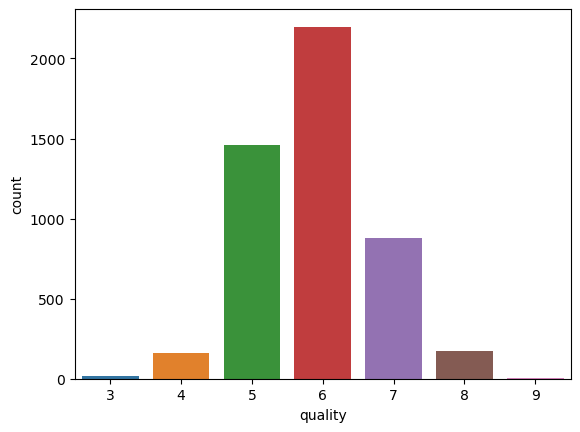

In [732]:
# Cantidades de vinos por calidad
sns.countplot(x='quality', data=whiteWine)

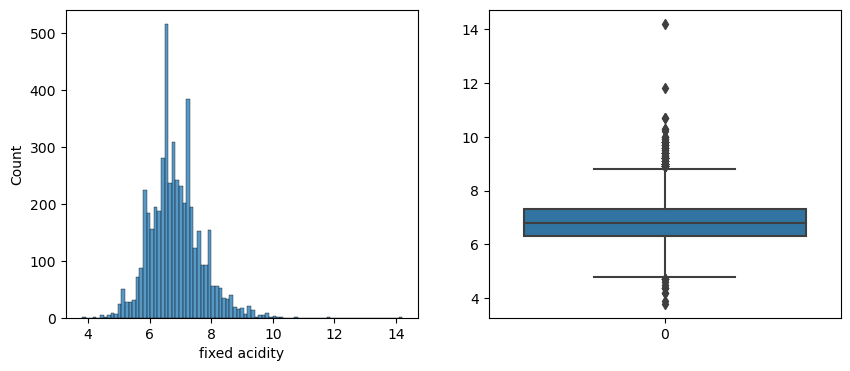

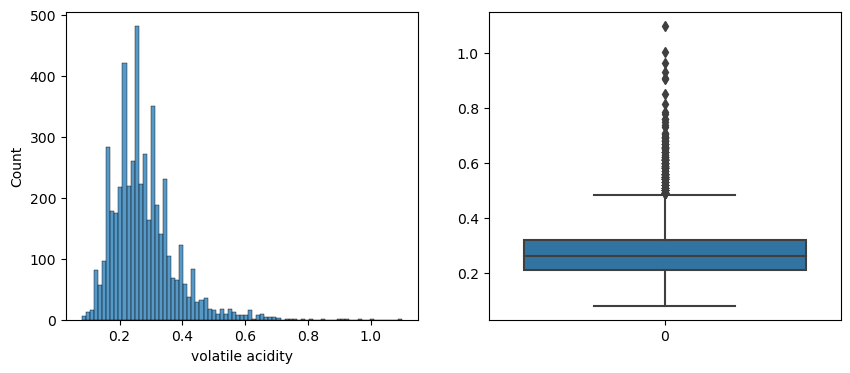

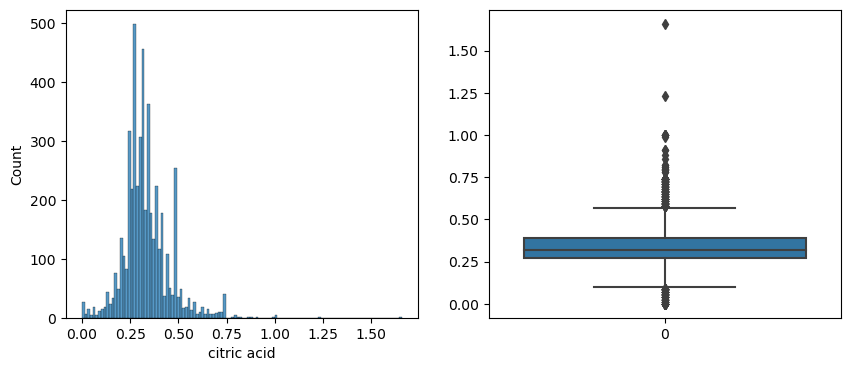

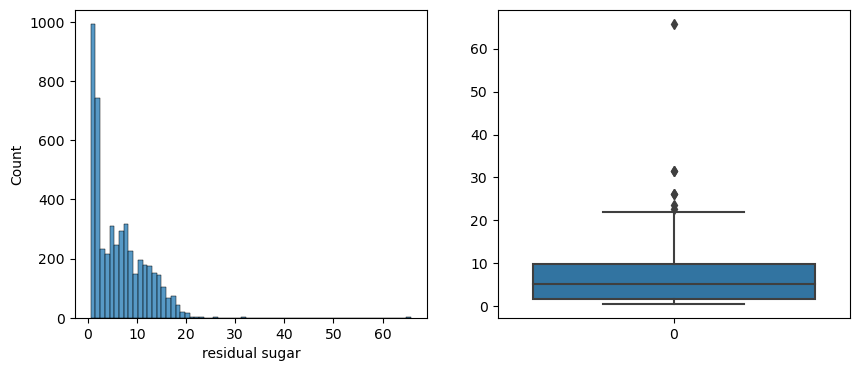

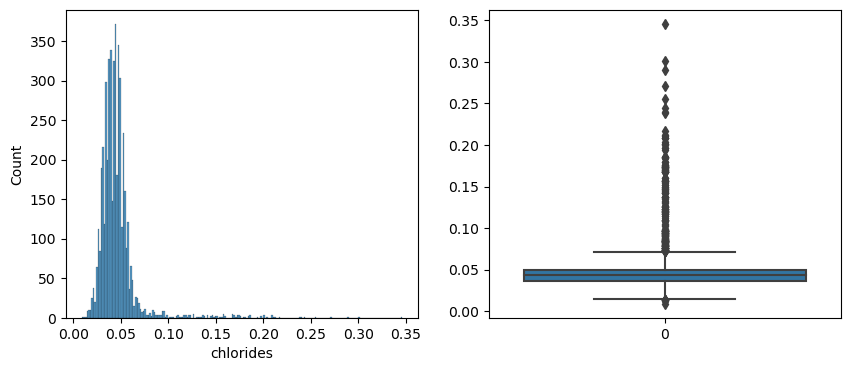

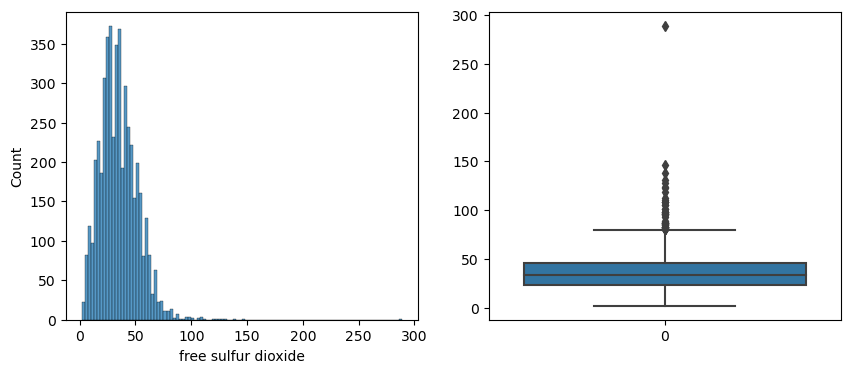

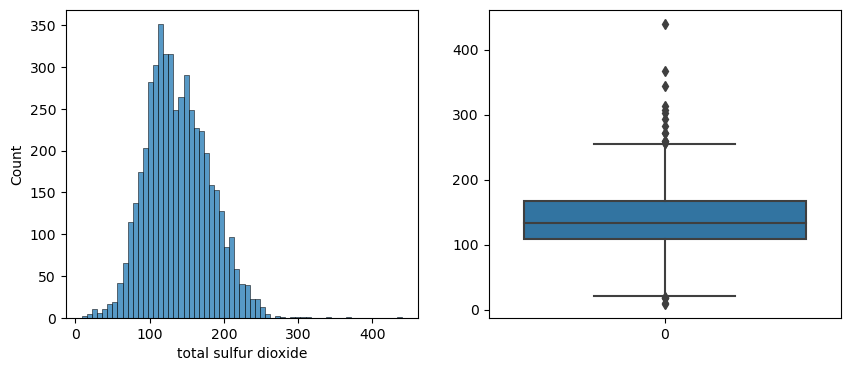

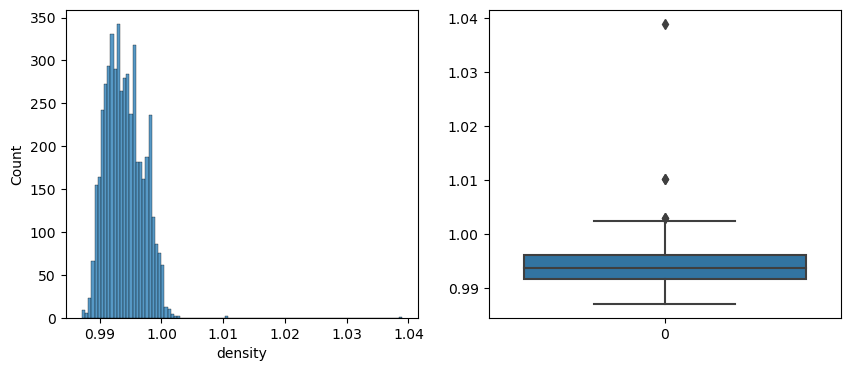

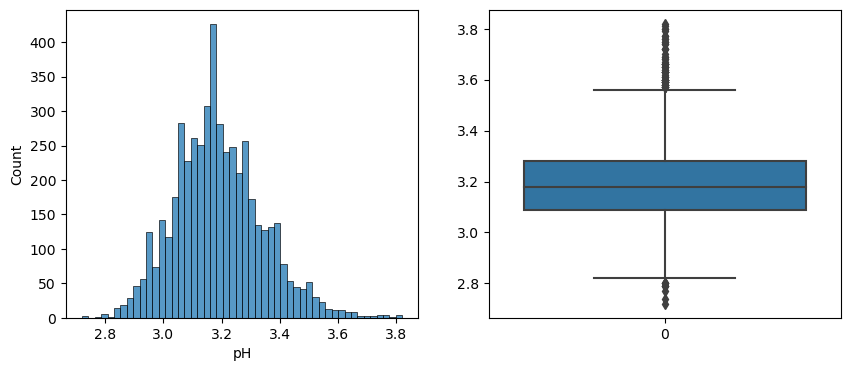

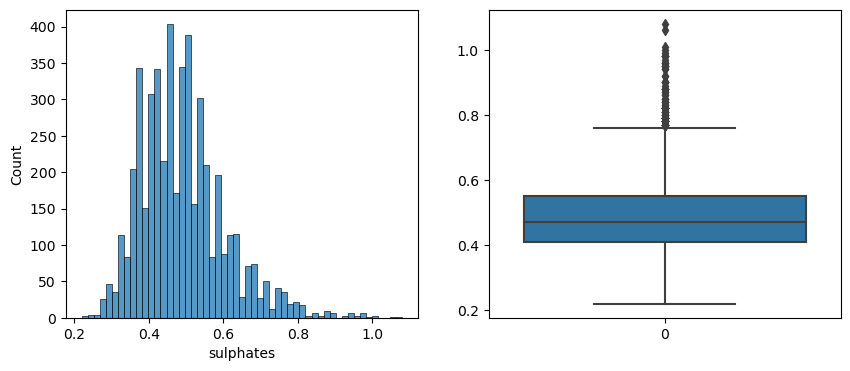

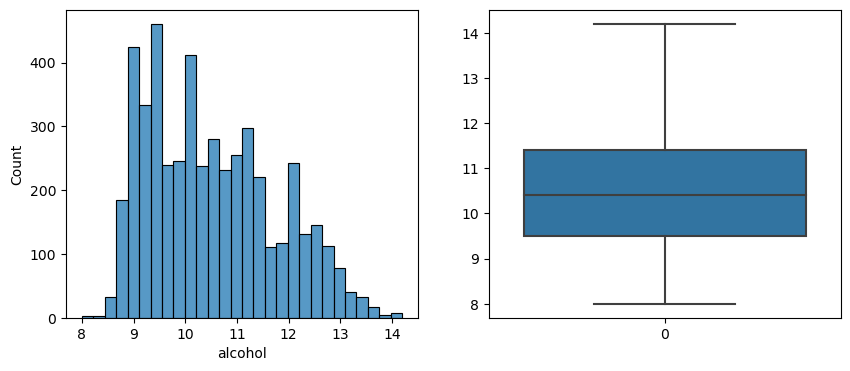

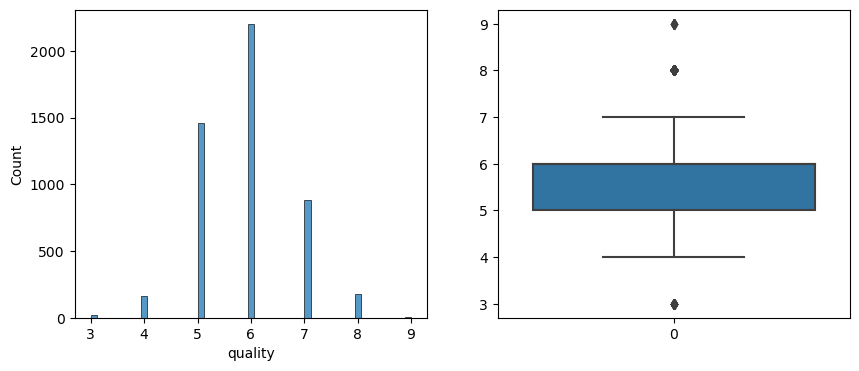

In [733]:
# Por cada atributo, mostrar histograma y boxplot
for atributo in whiteWine.columns:
  histograma_boxplot(whiteWine, atributo)

### Deteccion de Outliers

In [734]:
# Deteccion de outliers en wine
deteccion_outliers(whiteWine)

El atributo fixed acidity tiene 119 outliers
El atributo volatile acidity tiene 186 outliers
El atributo citric acid tiene 270 outliers
El atributo residual sugar tiene 7 outliers
El atributo chlorides tiene 208 outliers
El atributo free sulfur dioxide tiene 50 outliers
El atributo total sulfur dioxide tiene 19 outliers
El atributo density tiene 5 outliers
El atributo pH tiene 75 outliers
El atributo sulphates tiene 124 outliers
El atributo alcohol tiene 0 outliers
El atributo quality tiene 200 outliers


### Analisis Asimetrías

In [735]:
# Detectar asimetria en redWine
deteccion_asimetria(whiteWine)

El atributo fixed acidity tiene una asimetria de 0.6477514746297539
El atributo volatile acidity tiene una asimetria de 1.5769795029952025
El atributo citric acid tiene una asimetria de 1.2819203981671066
El atributo residual sugar tiene una asimetria de 1.0770937564240868
El atributo chlorides tiene una asimetria de 5.023330682759711
El atributo free sulfur dioxide tiene una asimetria de 1.4067449205303078
El atributo total sulfur dioxide tiene una asimetria de 0.3907098416536745
El atributo density tiene una asimetria de 0.9777730048689898
El atributo pH tiene una asimetria de 0.4577825459180807
El atributo sulphates tiene una asimetria de 0.9771936833065663
El atributo alcohol tiene una asimetria de 0.4873419932161276
El atributo quality tiene una asimetria de 0.15579639772222578


### Analisis de Correlaciones entre variables

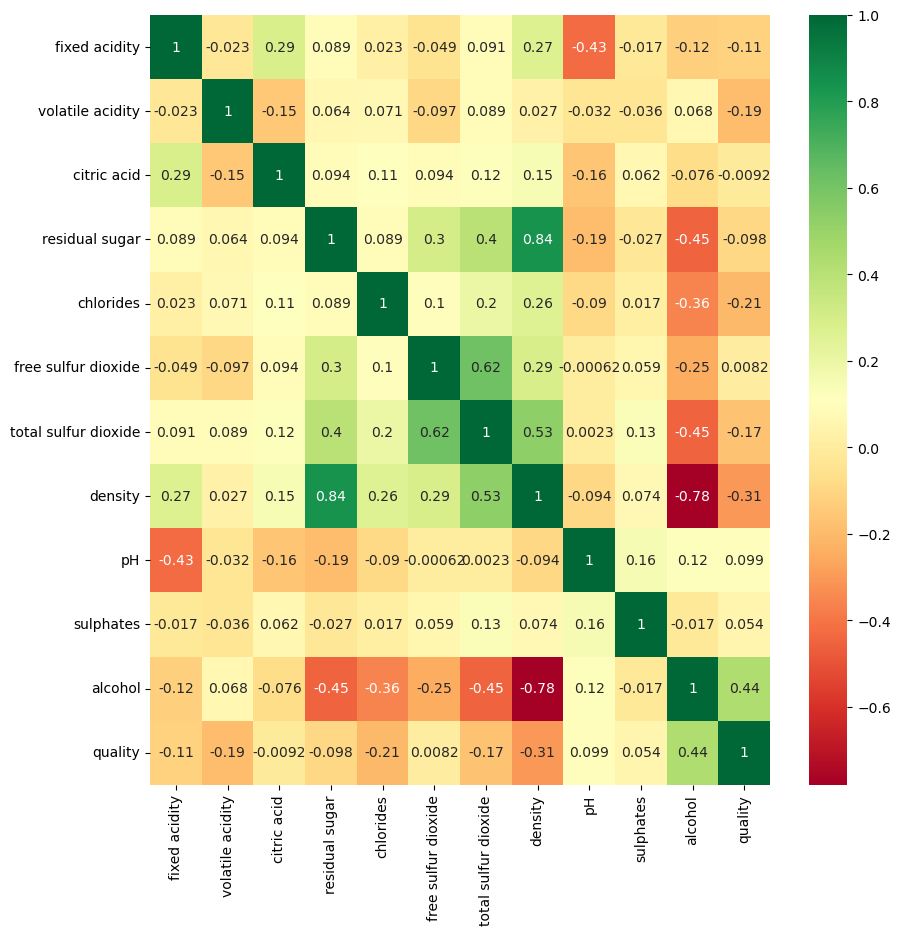

In [736]:
# Coeficiente de correlación de Pearson
plt.figure(figsize=(10,10))
sns.heatmap(whiteWine.corr(method='pearson'), annot=True, cmap='RdYlGn')
plt.show()

In [737]:
# Atributos con mayor correlacion entre ellos
mayor_correlacion(whiteWine, max_valor=0.6)

                level_0               level_1         0  abs_corr
4        residual sugar               density  0.838966  0.838966
12              density               alcohol -0.780138  0.780138
7   free sulfur dioxide  total sulfur dioxide  0.615501  0.615501


### Analisis de Correlaciones en relacion a la variable Quality

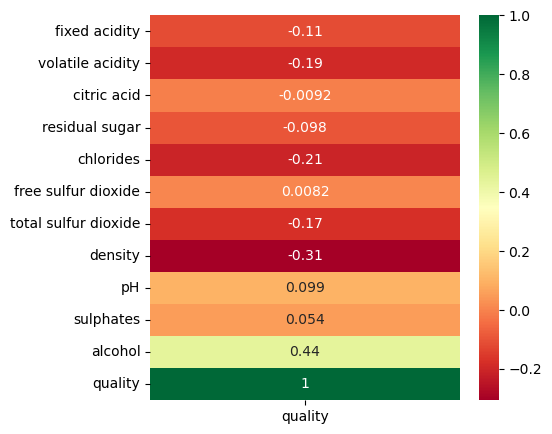

In [738]:
# Correlacion con la variable 'quality' del dataset wine a través de un mapa de calor
plt.figure(figsize=(5,5))
sns.heatmap(whiteWine.corr()[['quality']], annot=True, cmap='RdYlGn')
plt.show()

In [739]:
# Atributos con mayor correlacion con 'quality'
mayor_correlacion(whiteWine, atributo='quality')

            quality  abs_corr
alcohol    0.435575  0.435575
density   -0.307123  0.307123
chlorides -0.209934  0.209934


# Procesamiento de datos

## Funciones 

In [740]:
# Función de entrenamiento utilizando descenso de gradiente por lotes
def train_linear_regression(X, y, learning_rate, num_iterations, tipo='simple'):
    # Inicializa los parámetros del modelo
    if tipo == 'simple':
        theta0 = 0.0
        theta1 = 0.0
    elif tipo == 'multiple':
        theta = np.zeros(X.shape[1]+1)
        
    m = len(X)

    # Descenso de gradiente
    for _ in range(num_iterations):
        if tipo == 'simple':
            # Calcula las predicciones y el error
            y_pred = theta0 + theta1 * X
            error = y_pred - y

            # Actualiza los parámetros utilizando el gradiente
            theta0 -= (learning_rate / m) * np.sum(error)
            theta1 -= (learning_rate / m) * np.sum(error * X)
        elif tipo == 'multiple':
            # Calcula las predicciones y el error
            X_with_bias = np.column_stack((np.ones((m, 1)), X))
            y_pred = np.dot(X_with_bias, theta)
            error = y_pred - y
            
            # Actualiza los parámetros utilizando el gradiente
            theta -= (learning_rate / m) * np.dot(X_with_bias.T, error)
    
    if tipo == 'simple':
        return theta0, theta1
    elif tipo == 'multiple':
        return theta

In [741]:
# Función de entrenamiento utilizando descenso de gradiente estocástico
def train_linear_regression_stochastic(X, y, learning_rate, num_iterations, tipo='simple'):
    # Inicializa los parámetros del modelo
    if tipo == 'simple':
        theta0 = 0.0
        theta1 = 0.0
    elif tipo == 'multiple':
        theta = np.zeros(X.shape[1]+1)
    m = len(X)

    # Descenso de gradiente estocástico
    for _ in range(num_iterations):
        # Selecciona una muestra aleatoria
        random_index = np.random.randint(0, m)
        X_sample = X[random_index]
        y_sample = y[random_index]

        # Calcula la predicción y el error para la muestra seleccionada
        if tipo == 'simple':
            y_pred = theta0 + theta1 * X_sample
            error = y_pred - y_sample

            # Actualiza los parámetros utilizando el gradiente de la muestra seleccionada
            theta0 -= learning_rate * error
            theta1 -= learning_rate * error * X_sample
        elif tipo == 'multiple':
            X_sample_with_bias = np.concatenate([[1.0], X_sample])
            y_pred = np.dot(X_sample_with_bias, theta)
            error = y_pred - y_sample
            theta -= learning_rate * error * X_sample_with_bias
    if tipo == 'simple':
        return theta0, theta1
    elif tipo == 'multiple':
        return theta

In [742]:
  # Función para hacer predicciones
  def predict(X, theta = '', theta0 = '', theta1 = '', tipo_regresion='simple'):
    if tipo_regresion == 'simple':
      return theta0 + theta1 * X
    elif tipo_regresion == 'multiple':
      X_with_bias = np.column_stack([np.ones((len(X), 1)), X])  # Añade una columna de unos para el término de sesgo
      return np.dot(X_with_bias, theta)

In [743]:
# Cálculo de las métricas de evaluación
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r_squared(y_true, y_pred):
    ssr = np.sum((y_true - y_pred) ** 2)
    sst = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ssr / sst)

def adjusted_r_squared(y_true, y_pred, num_features):
    r2 = r_squared(y_true, y_pred)
    n = len(y_true)
    return 1 - ((1 - r2) * (n - 1) / (n - num_features - 1))

In [744]:
# Funcion de regresion lineal simple
def regresion_lineal_simple(data, atributo, tipo_entrenamiento, tipo_regresion='simple'):
  # División de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
  train_size = int(0.8 * len(data))
  train_data = data[:train_size]
  test_data = data[train_size:]

  # Extrae las características y las etiquetas de entrenamiento y prueba
  train_X = train_data[atributo].values
  train_y = train_data['quality'].values
  test_X = test_data[atributo].values
  test_y = test_data['quality'].values
  
  if tipo_regresion == 'multiple':
    # Normalización de los datos de entrenamiento
    scaler = MinMaxScaler()
    train_X = scaler.fit_transform(train_X)

    # Normalización de los datos de prueba
    test_X = scaler.transform(test_X)

  # Hiperparámetros del modelo
  learning_rate = 0.01
  num_iterations = 1000

  # Entrena el modelo utilizando los datos de entrenamiento
  if tipo_entrenamiento == 'batch' and tipo_regresion == 'simple':
    theta0, theta1 = train_linear_regression(train_X, train_y, learning_rate, num_iterations)
  elif tipo_entrenamiento == 'batch' and tipo_regresion == 'multiple':
    theta = train_linear_regression(train_X, train_y, learning_rate, num_iterations, tipo='multiple')
  elif tipo_entrenamiento == 'stochastic' and tipo_regresion == 'simple':
    theta0, theta1 = train_linear_regression_stochastic(train_X, train_y, learning_rate, num_iterations)
  elif tipo_entrenamiento == 'stochastic' and tipo_regresion == 'multiple':
    theta = train_linear_regression_stochastic(train_X, train_y, learning_rate, num_iterations, tipo='multiple')
    
  # Realiza predicciones en los conjuntos de entrenamiento y prueba
  if tipo_regresion == 'simple':
    train_predictions = predict(train_X, theta0=theta0, theta1=theta1)
    test_predictions = predict(test_X, theta0=theta0, theta1=theta1)
  elif tipo_regresion == 'multiple':
    train_predictions = predict(train_X, theta=theta, tipo_regresion=tipo_regresion)
    test_predictions = predict(test_X, theta=theta, tipo_regresion=tipo_regresion)

  # Calcular métricas de evaluación en los conjuntos de entrenamiento y prueba
  if tipo_regresion == 'simple':
    num_features = 1
  elif tipo_regresion == 'multiple':
    num_features = 3
    
  train_mse = mse(train_y, train_predictions)
  train_rmse = rmse(train_y, train_predictions)
  train_mae = mae(train_y, train_predictions)
  train_r2 = r_squared(train_y, train_predictions)
  train_adjusted_r2 = adjusted_r_squared(train_y, train_predictions, num_features)

  test_mse = mse(test_y, test_predictions)
  test_rmse = rmse(test_y, test_predictions)
  test_mae = mae(test_y, test_predictions)
  test_r2 = r_squared(test_y, test_predictions)
  test_adjusted_r2 = adjusted_r_squared(test_y, test_predictions, num_features)

  # Imprimir las métricas de evaluación
  print("Métricas de evaluación (conjunto de entrenamiento):")
  print("MSE:", train_mse)
  print("RMSE:", train_rmse)
  print("MAE:", train_mae)
  print("R^2:", train_r2)
  print("R^2 ajustado:", train_adjusted_r2)
  print("--------------------------------------------")
  print("Métricas de evaluación (conjunto de prueba):")
  print("MSE:", test_mse)
  print("RMSE:", test_rmse)
  print("MAE:", test_mae)
  print("R^2:", test_r2)
  print("R^2 ajustado:", test_adjusted_r2)
  
  if tipo_regresion == 'simple':
    # Gráfico de la regresión
    plt.scatter(train_X, train_y, color='blue', label='Training Data')
    #plt.scatter(test_X, test_y, color='red', label='Test Data')
    plt.plot(train_X, train_predictions, color='green', label='Regression Line')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Regresión lineal simple')
    plt.legend()
    plt.show()
  elif tipo_regresion == 'multiple':
    # plt.scatter(train_X[:, 0], train_y, color='blue', label='Training Data')
    # #plt.scatter(test_X[:, 0], test_y, color='red', label='Test Data')
    # plt.plot(train_X[:, 0], train_predictions, color='green', label='Regression Line')
    # plt.xlabel('X')
    # plt.ylabel('Y')
    # plt.title('Regresión lineal con múltiples variables')
    # plt.legend()
    # plt.show()
    # Grafico de los datos de entrenamiento en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(train_X[:, 0], train_X[:, 1], train_X[:, 2], c=train_y, cmap='viridis')
    ax.set_xlabel('Alcohol')
    ax.set_ylabel('Fixed Acidity')
    ax.set_zlabel('Volatile Acidity')
    ax.set_title('Datos de entrenamiento')
    plt.show()
  
  data = {
    'Métricas de evaluación (conjunto de entrenamiento)': {
      'MSE': train_mse,
      'RMSE': train_rmse,
      'MAE': train_mae,
      'R^2': train_r2,
      'R^2 ajustado': train_adjusted_r2
    },
    'Métricas de evaluación (conjunto de prueba)': {
      'MSE': test_mse,
      'RMSE': test_rmse,
      'MAE': test_mae,
      'R^2': test_r2,
      'R^2 ajustado': test_adjusted_r2
    } 
  }
  
  return data
    

# RED WINE

## ALCOHOL

Métricas de evaluación (conjunto de entrenamiento):
MSE: 0.522383584134583
RMSE: 0.7227610837161772
MAE: 0.5477898287984648
R^2: 0.20784713756794848
R^2 ajustado: 0.20722681426142375
--------------------------------------------
Métricas de evaluación (conjunto de prueba):
MSE: 0.57774218953131
RMSE: 0.760093539987882
MAE: 0.5666268607902646
R^2: 0.046039728328074236
R^2 ajustado: 0.043039853259923544


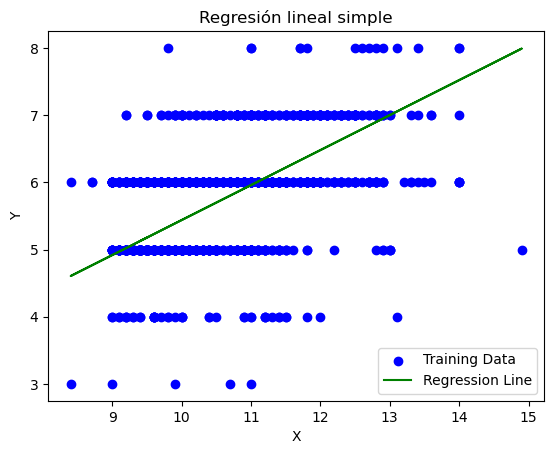

In [745]:
data1 = regresion_lineal_simple(redWine, 'alcohol', 'batch')

Métricas de evaluación (conjunto de entrenamiento):
MSE: 0.5220248194766935
RMSE: 0.7225128507346382
MAE: 0.5447423807461336
R^2: 0.2083911754346005
R^2 ajustado: 0.20777127815616248
--------------------------------------------
Métricas de evaluación (conjunto de prueba):
MSE: 0.5661859159220209
RMSE: 0.7524532649420965
MAE: 0.558880983086093
R^2: 0.06512129465920169
R^2 ajustado: 0.062181424516620454


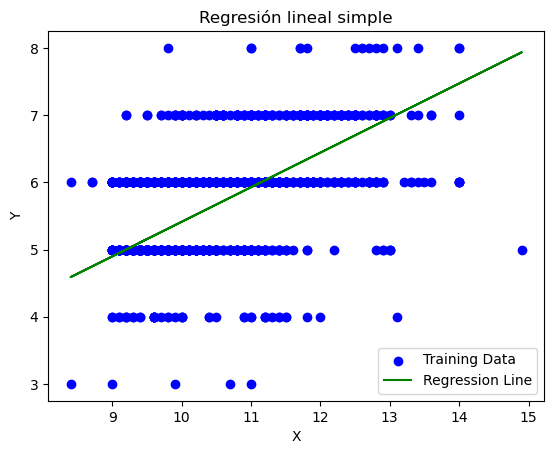

In [746]:
data2 = regresion_lineal_simple(redWine, 'alcohol', 'stochastic')

In [747]:
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

df_comparacion = pd.concat([df1, df2], keys=['Batch', 'Stochastic'])

df_comparacion

Métricas de evaluación (conjunto de entrenamiento)  \
Batch      MSE                                                    0.522384    
           RMSE                                                   0.722761    
           MAE                                                    0.547790    
           R^2                                                    0.207847    
           R^2 ajustado                                           0.207227    
Stochastic MSE                                                    0.522025    
           RMSE                                                   0.722513    
           MAE                                                    0.544742    
           R^2                                                    0.208391    
           R^2 ajustado                                           0.207771    

                         Métricas de evaluación (conjunto de prueba)  
Batch      MSE                                              0.577742  
           RMSE                                             0.760094  
           MAE                                              0.566627  
           R^2                                              0.046040  
           R^2 ajustado                                     0.043040  
Stochastic MSE                                              0.566186  
           RMSE                                             0.752453  
           MAE                                              0.558881  
           R^2                                              0.065121  
           R^2 ajustado                                     0.062181

## ACIDO VOLATIL

Métricas de evaluación (conjunto de entrenamiento):
MSE: 0.8856728833625465
RMSE: 0.9411019516303993
MAE: 0.7814927830913713
R^2: -0.34305198525024405
R^2 ajustado: -0.34410370959264847
--------------------------------------------
Métricas de evaluación (conjunto de prueba):
MSE: 0.8675611497657771
RMSE: 0.9314296268456234
MAE: 0.7301819301749545
R^2: -0.43250551044916774
R^2 ajustado: -0.4370102447587565


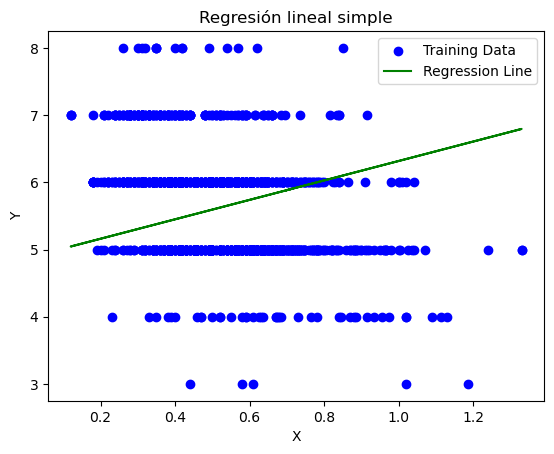

In [748]:
data1 = regresion_lineal_simple(redWine, 'volatile acidity', 'batch')

Métricas de evaluación (conjunto de entrenamiento):
MSE: 0.9034731654677771
RMSE: 0.9505120543516411
MAE: 0.7875305114066976
R^2: -0.37004468726081075
R^2 ajustado: -0.37111754919288664
--------------------------------------------
Métricas de evaluación (conjunto de prueba):
MSE: 0.8370241904868134
RMSE: 0.9148902614449524
MAE: 0.7226857739143896
R^2: -0.38208328666553304
R^2 ajustado: -0.38642946052297167


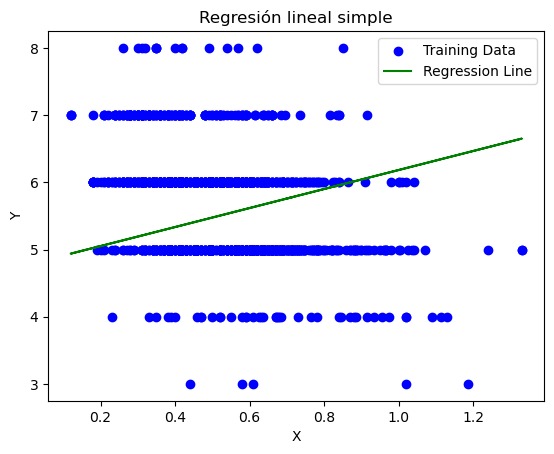

In [749]:
data2 = regresion_lineal_simple(redWine, 'volatile acidity', 'stochastic')

In [750]:
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

df_comparacion = pd.concat([df1, df2], keys=['Batch', 'Stochastic'])

df_comparacion

Métricas de evaluación (conjunto de entrenamiento)  \
Batch      MSE                                                    0.885673    
           RMSE                                                   0.941102    
           MAE                                                    0.781493    
           R^2                                                   -0.343052    
           R^2 ajustado                                          -0.344104    
Stochastic MSE                                                    0.903473    
           RMSE                                                   0.950512    
           MAE                                                    0.787531    
           R^2                                                   -0.370045    
           R^2 ajustado                                          -0.371118    

                         Métricas de evaluación (conjunto de prueba)  
Batch      MSE                                              0.867561  
           RMSE                                             0.931430  
           MAE                                              0.730182  
           R^2                                             -0.432506  
           R^2 ajustado                                    -0.437010  
Stochastic MSE                                              0.837024  
           RMSE                                             0.914890  
           MAE                                              0.722686  
           R^2                                             -0.382083  
           R^2 ajustado                                    -0.386429

## SULFATO

Métricas de evaluación (conjunto de entrenamiento):
MSE: 0.6788702063839784
RMSE: 0.8239358023438346
MAE: 0.6515884162132225
R^2: -0.029452290499923706
R^2 ajustado: -0.03025843951362761
--------------------------------------------
Métricas de evaluación (conjunto de prueba):
MSE: 0.5232204470526703
RMSE: 0.72333978672037
MAE: 0.5650812368577289
R^2: 0.13606530930415628
R^2 ajustado: 0.13334853354725107


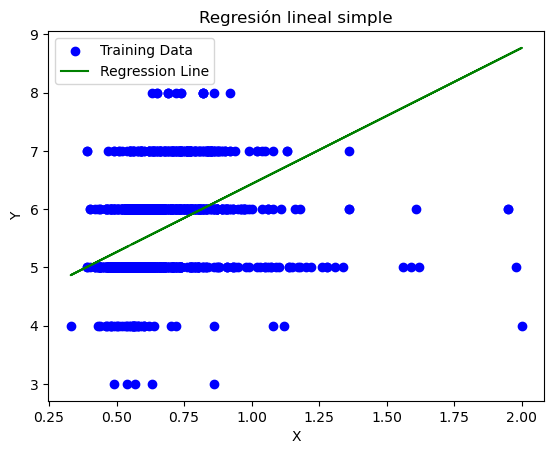

In [751]:
data1 = regresion_lineal_simple(redWine, 'sulphates', 'batch')

Métricas de evaluación (conjunto de entrenamiento):
MSE: 0.67281041969609
RMSE: 0.8202502177360821
MAE: 0.6514487357437998
R^2: -0.020263109376456923
R^2 ajustado: -0.02106206247698661
--------------------------------------------
Métricas de evaluación (conjunto de prueba):
MSE: 0.5223101457837298
RMSE: 0.7227102779009925
MAE: 0.5665192491037601
R^2: 0.1375683867348113
R^2 ajustado: 0.13485633763649318


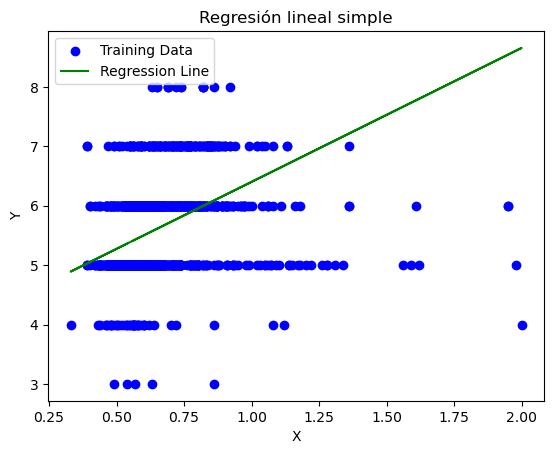

In [752]:
data2 = regresion_lineal_simple(redWine, 'sulphates', 'stochastic')

In [753]:
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

df_comparacion = pd.concat([df1, df2], keys=['Batch', 'Stochastic'])

df_comparacion

Métricas de evaluación (conjunto de entrenamiento)  \
Batch      MSE                                                    0.678870    
           RMSE                                                   0.823936    
           MAE                                                    0.651588    
           R^2                                                   -0.029452    
           R^2 ajustado                                          -0.030258    
Stochastic MSE                                                    0.672810    
           RMSE                                                   0.820250    
           MAE                                                    0.651449    
           R^2                                                   -0.020263    
           R^2 ajustado                                          -0.021062    

                         Métricas de evaluación (conjunto de prueba)  
Batch      MSE                                              0.523220  
           RMSE                                             0.723340  
           MAE                                              0.565081  
           R^2                                              0.136065  
           R^2 ajustado                                     0.133349  
Stochastic MSE                                              0.522310  
           RMSE                                             0.722710  
           MAE                                              0.566519  
           R^2                                              0.137568  
           R^2 ajustado                                     0.134856

# WHITE WINE

## DENSIDAD

Métricas de evaluación (conjunto de entrenamiento):
MSE: 0.8351789691110675
RMSE: 0.9138812664187113
MAE: 0.6977311226908665
R^2: -0.006338997983689865
R^2 ajustado: -0.0065959793417040835
--------------------------------------------
Métricas de evaluación (conjunto de prueba):
MSE: 0.6046215050757406
RMSE: 0.7775741154872252
MAE: 0.5723398943049222
R^2: -0.005510849382058591
R^2 ajustado: -0.006538979084903307


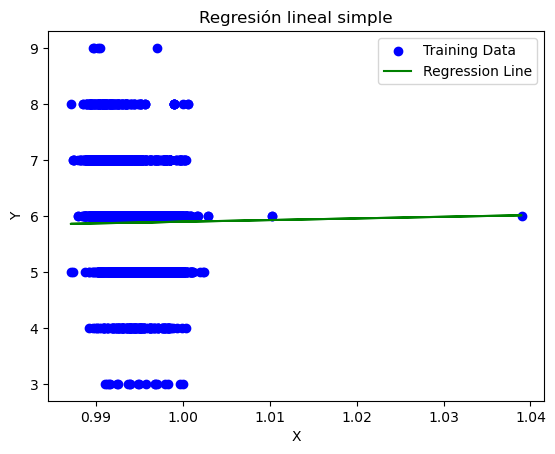

In [754]:
data1 = regresion_lineal_simple(whiteWine, 'density', 'batch')

Métricas de evaluación (conjunto de entrenamiento):
MSE: 0.8399591169261804
RMSE: 0.916492835174493
MAE: 0.6762298185734463
R^2: -0.012098780426002653
R^2 ajustado: -0.012357232617122627
--------------------------------------------
Métricas de evaluación (conjunto de prueba):
MSE: 0.6104838470068013
RMSE: 0.7813346574975419
MAE: 0.5444419285977863
R^2: -0.015260169187893746
R^2 ajustado: -0.016298267520396648


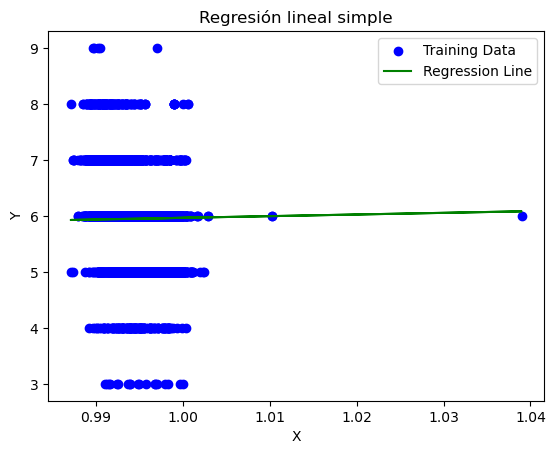

In [755]:
data2 = regresion_lineal_simple(whiteWine, 'density', 'stochastic')

In [756]:
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

df_comparacion = pd.concat([df1, df2], keys=['Batch', 'Stochastic'])

df_comparacion

Métricas de evaluación (conjunto de entrenamiento)  \
Batch      MSE                                                    0.835179    
           RMSE                                                   0.913881    
           MAE                                                    0.697731    
           R^2                                                   -0.006339    
           R^2 ajustado                                          -0.006596    
Stochastic MSE                                                    0.839959    
           RMSE                                                   0.916493    
           MAE                                                    0.676230    
           R^2                                                   -0.012099    
           R^2 ajustado                                          -0.012357    

                         Métricas de evaluación (conjunto de prueba)  
Batch      MSE                                              0.604622  
           RMSE                                             0.777574  
           MAE                                              0.572340  
           R^2                                             -0.005511  
           R^2 ajustado                                    -0.006539  
Stochastic MSE                                              0.610484  
           RMSE                                             0.781335  
           MAE                                              0.544442  
           R^2                                             -0.015260  
           R^2 ajustado                                    -0.016298

## ALCOHOL

Métricas de evaluación (conjunto de entrenamiento):
MSE: 0.7106961689813209
RMSE: 0.8430279763930263
MAE: 0.6482332890353577
R^2: 0.14365507631886076
R^2 ajustado: 0.14343639783988194
--------------------------------------------
Métricas de evaluación (conjunto de prueba):
MSE: 0.6832611498323993
RMSE: 0.8265961225607094
MAE: 0.6333964694190838
R^2: -0.1362918674744693
R^2 ajustado: -0.1374537200996988


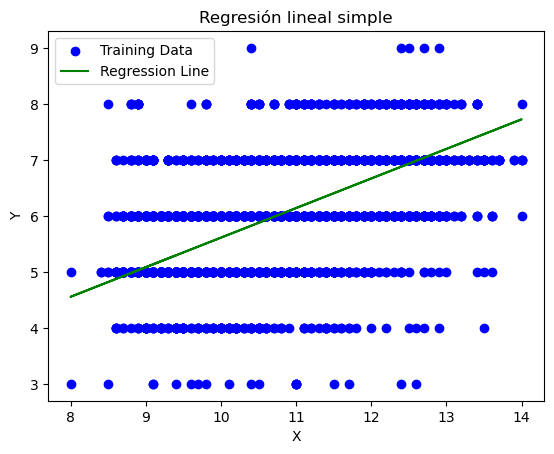

In [757]:
data1 = regresion_lineal_simple(whiteWine, 'alcohol', 'batch')

Métricas de evaluación (conjunto de entrenamiento):
MSE: 1.3501706787069427
RMSE: 1.1619684499619354
MAE: 0.9330395859116957
R^2: -0.6268721533578399
R^2 ajustado: -0.6272875956850505
--------------------------------------------
Métricas de evaluación (conjunto de prueba):
MSE: 1.6505144117552983
RMSE: 1.2847234767666147
MAE: 1.0910978206027284
R^2: -1.7448744944550065
R^2 ajustado: -1.7476811145924862


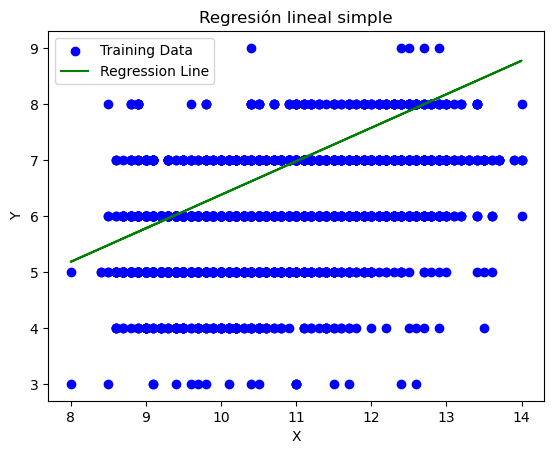

In [758]:
data2 = regresion_lineal_simple(whiteWine, 'alcohol', 'stochastic')

In [759]:
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

df_comparacion = pd.concat([df1, df2], keys=['Batch', 'Stochastic'])

df_comparacion

Métricas de evaluación (conjunto de entrenamiento)  \
Batch      MSE                                                    0.710696    
           RMSE                                                   0.843028    
           MAE                                                    0.648233    
           R^2                                                    0.143655    
           R^2 ajustado                                           0.143436    
Stochastic MSE                                                    1.350171    
           RMSE                                                   1.161968    
           MAE                                                    0.933040    
           R^2                                                   -0.626872    
           R^2 ajustado                                          -0.627288    

                         Métricas de evaluación (conjunto de prueba)  
Batch      MSE                                              0.683261  
           RMSE                                             0.826596  
           MAE                                              0.633396  
           R^2                                             -0.136292  
           R^2 ajustado                                    -0.137454  
Stochastic MSE                                              1.650514  
           RMSE                                             1.284723  
           MAE                                              1.091098  
           R^2                                             -1.744874  
           R^2 ajustado                                    -1.747681

## CLORURO

Métricas de evaluación (conjunto de entrenamiento):
MSE: 0.8318166823670883
RMSE: 0.9120398469184821
MAE: 0.6963402513900889
R^2: -0.00228765043063639
R^2 ajustado: -0.0025435972259455486
--------------------------------------------
Métricas de evaluación (conjunto de prueba):
MSE: 0.6030657084646427
RMSE: 0.776573054171108
MAE: 0.5700511179514071
R^2: -0.002923494551378303
R^2 ajustado: -0.003948978697136285


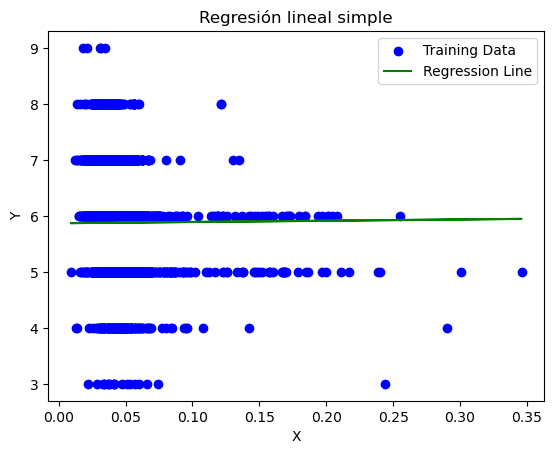

In [770]:
data1 = regresion_lineal_simple(whiteWine, 'chlorides', 'batch')

Métricas de evaluación (conjunto de entrenamiento):
MSE: 0.831923666230966
RMSE: 0.9120984959043437
MAE: 0.6956101178745704
R^2: -0.0024165593691478637
R^2 ajustado: -0.002672539082980707
--------------------------------------------
Métricas de evaluación (conjunto de prueba):
MSE: 0.6032135323813949
RMSE: 0.7766682254227959
MAE: 0.5691028063369036
R^2: -0.0031693319072194637
R^2 ajustado: -0.004195067420416976


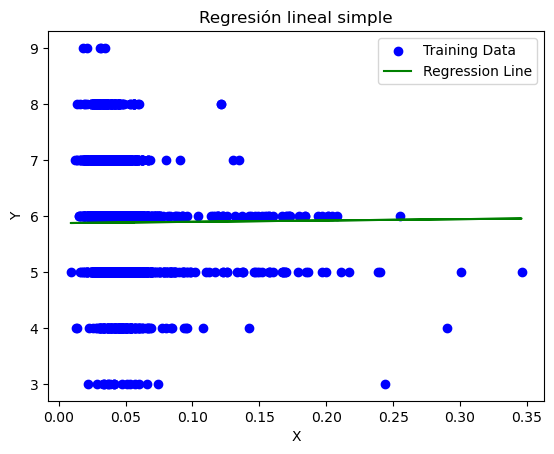

In [771]:
data2 = regresion_lineal_simple(whiteWine, 'chlorides', 'stochastic')

In [772]:
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

df_comparacion = pd.concat([df1, df2], keys=['Batch', 'Stochastic'])

df_comparacion

Métricas de evaluación (conjunto de entrenamiento)  \
Batch      MSE                                                    0.831817    
           RMSE                                                   0.912040    
           MAE                                                    0.696340    
           R^2                                                   -0.002288    
           R^2 ajustado                                          -0.002544    
Stochastic MSE                                                    0.831924    
           RMSE                                                   0.912098    
           MAE                                                    0.695610    
           R^2                                                   -0.002417    
           R^2 ajustado                                          -0.002673    

                         Métricas de evaluación (conjunto de prueba)  
Batch      MSE                                              0.603066  
           RMSE                                             0.776573  
           MAE                                              0.570051  
           R^2                                             -0.002923  
           R^2 ajustado                                    -0.003949  
Stochastic MSE                                              0.603214  
           RMSE                                             0.776668  
           MAE                                              0.569103  
           R^2                                             -0.003169  
           R^2 ajustado                                    -0.004195

## Analisis de los resultados para White Wine

## Analisis de los resultados para Red Wine

## Regresion Linear Multiple Batch Gradient Descent

## Regresion Linear Multiple Estocastica

# OTRAS WEAS